In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

DATA_DIR = '../data/raw/'

# Import and process data

### Weight data

In [2]:
weight_raw = pd.read_csv(DATA_DIR + 'pcori_heerman_cohort_weight_20170116.csv', 
                         parse_dates=[1], infer_datetime_format=True)
weight_raw.head()

,MRN,WEIGHT_DATE,WEIGHT,PREGNANCY_INDICATOR
0,9994104,2011-08-02,72.58,1
1,9994104,2016-01-11,79.51,1
2,9994104,2016-02-02,79.85,1
3,9994104,2016-02-06,80.65,1
4,9994104,2015-11-12,80.74,1


In [3]:
weight_raw.shape

(10196428, 4)

In [4]:
weight_raw.isnull().mean()

MRN                    0.0
WEIGHT_DATE            0.0
WEIGHT                 0.0
PREGNANCY_INDICATOR    0.0
dtype: float64

In [5]:
# fig, ax = plt.subplots(figsize=(8,6))
# grouped_weight = weight_raw.set_index('WEIGHT_DATE').groupby('MRN')
# grouped_weight.plot(ax=ax, alpha=0.4)

In [6]:
weight_counts = weight_raw.groupby('MRN')['WEIGHT_DATE'].count()

In [7]:
weight_counts.describe()

count    529392.000000
mean         19.260639
std          26.483963
min           1.000000
25%           5.000000
50%          10.000000
75%          23.000000
max        1071.000000
Name: WEIGHT_DATE, dtype: float64

In [8]:
many_weights = weight_counts[weight_counts>200]

In [9]:
grouped_weights = weight_raw[weight_raw.MRN.isin(many_weights.index)].groupby('MRN')

In [10]:
# fig, ax = plt.subplots(figsize=(14,8))
# grouped_weight = weight_raw[weight_raw.MRN.isin(many_weights.index)].set_index('WEIGHT_DATE').groupby('MRN')
# grouped_weight.plot(ax=ax, alpha=0.4)

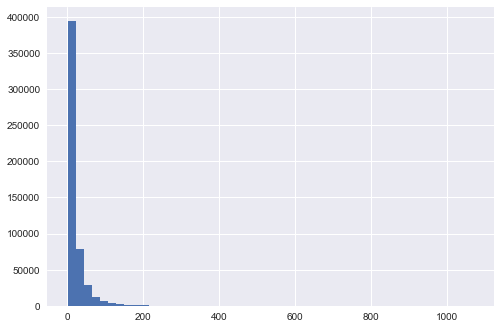

In [11]:
weight_counts.hist(bins=50)

### Lab values

In [12]:
lab_raw = pd.read_csv(DATA_DIR + 'pcori_heerman_cohort_Lab_20170116.csv', 
                      parse_dates=[1], infer_datetime_format=True)
lab_raw.head()

,MRN,LAB_DATE,LAB_NAME,LAB_CODE,LAB_UNIT
0,1750306,09/17/2013,Creat,NaN,mg/dL
1,1750306,09/19/2014,Creat,2160-0,mg/dL
2,3584729,12/20/2004,Creat,NaN,mg/dL
3,3584729,11/29/2005,HgbA1C,NaN,%
4,3584729,11/29/2005,Creat,NaN,mg/dL


In [13]:
lab_raw.shape

(8461017, 5)

### ICD codes

In [14]:
icd_raw = pd.read_csv(DATA_DIR + 'pcori_heerman_cohort_ICD_9_10_20170116.csv', 
                      parse_dates=[1], infer_datetime_format=True)
icd_raw.head()

,MRN,EVENT_DATE,ICD_CODE,CODE_TYPE
0,2360139,2003-01-07,401.1,9
1,2360139,2002-01-08,401.1,9
2,2360139,2003-01-08,401.1,9
3,2360139,2005-01-11,401.1,9
4,2360139,2004-01-13,401.9,9


In [15]:
icd_raw.shape

(8796137, 4)

In [16]:
icd_raw.CODE_TYPE.value_counts()

9     7098563
10    1697574
Name: CODE_TYPE, dtype: int64

### Height measurements

Perhaps choose modal or median for each patient.

In [17]:
height_raw = pd.read_csv(DATA_DIR + 'pcori_heerman_cohort_Height_20170116.csv', 
                         parse_dates=[1], infer_datetime_format=True)
height_raw.head()

,MRN,HEIGHT_DATE,HEIGHT
0,1221225,2014-03-04,154.94
1,1221225,2015-02-23,154.94
2,1221225,2015-02-23,154.94
3,1221225,2004-05-28,180.34
4,1221225,2005-02-02,180.34


In [18]:
height_raw.shape

(4976321, 3)

### Demographics

In [19]:
demographics_raw = pd.read_csv(DATA_DIR + 'pcori_heerman_cohort_Demographics_20170116.csv', 
                               index_col=0, parse_dates=['DOB'], infer_datetime_format=True)
demographics_raw.head()

/Users/fonnescj/anaconda3/envs/bmi/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEX,RACE,ETHNICITY,DOB,DOD,ZIP_CODE
MRN,,,,,,
28997286,2,7,UN,1958-01-09,NaN,422100000
22710289,2,2,NH,1969-09-11,NaN,370640000
15333065,1,1,NH,1996-12-28,NaN,372060000
11732831,1,2,NH,1991-01-31,NaN,370400000
26724542,2,1,NH,1958-08-19,NaN,421340000


In [20]:
demographics_raw.shape

(529428, 6)

In [21]:
demographics_raw.index.is_unique

True

In [22]:
demographics_raw['male'] = (demographics_raw.SEX==1).astype(int)

In [23]:
demographics_raw['race'] = demographics_raw.RACE.replace(dict(zip(range(1, 8), ['white', 'black', 'native', 'asian', 
                                                     'hispanic', 'other', 'unknown'])))

In [24]:
demographics_raw.race.value_counts()

white       419554
black        52455
unknown      32724
hispanic     13540
asian         9708
other          729
native         718
Name: race, dtype: int64

In [25]:
demographics_raw.ETHNICITY.value_counts()

NH    450556
UN     65332
HL     13540
Name: ETHNICITY, dtype: int64

In [26]:
demographics_raw['hispanic'] = (demographics_raw.ETHNICITY=='HL')
demographics_raw.loc[demographics_raw.ETHNICITY=='UN', 'hispanic'] = np.nan

There are no non-null death dates.

In [27]:
demographics_raw.isnull().mean()

SEX          0.000000
RACE         0.000000
ETHNICITY    0.000000
DOB          0.000000
DOD          1.000000
ZIP_CODE     0.001067
male         0.000000
race         0.000000
hispanic     0.123401
dtype: float64

### CPT codes

In [28]:
cpt_raw = pd.read_csv(DATA_DIR + 'pcori_heerman_cohort_CPT_20170116.csv',
                     parse_dates=[1], infer_datetime_format=True)
cpt_raw.head()

,MRN,CPT_DATE,CPT_CODE
0,31275076,2012-05-29,43775
1,31275076,2012-05-29,43775
2,31275076,2012-05-29,43775
3,31275076,2012-05-29,43775
4,31275076,2012-05-29,43775


In [29]:
cpt_raw.isnull().mean()

MRN         0.0
CPT_DATE    0.0
CPT_CODE    0.0
dtype: float64

In [33]:
demographics_raw.merge(cpt_raw, left_index=True, right_on='MRN', how='inner').shape

(65769, 12)

## Data processing

Apply Greevy algorithm to weight data.

- how does the distribution change after applying filter?
- add updated flags from Shenghua

Start by aligning data to first weight measurement.

Remove short trajectories for initial model fitting.